In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'D:\\Etda_works\\Avocado.xlsx', sheet_name='Avocado')
print(df)
   

            Date  AveragePrice  Total Volume  3-5.oz(4046)  8-10.oz(4225)  \
0     2015-12-27          1.33      64236.62       1036.74       54454.85   
1     2015-12-20          1.35      54876.98        674.28       44638.81   
2     2015-12-13          0.93     118220.22        794.70      109149.67   
3     2015-12-06          1.08      78992.15       1132.00       71976.41   
4     2015-11-29          1.28      51039.60        941.48       43838.39   
...          ...           ...           ...           ...            ...   
18244 2018-02-04          1.63      17074.83       2046.96        1529.20   
18245 2018-01-28          1.71      13888.04       1191.70        3431.50   
18246 2018-01-21          1.87      13766.76       1191.92        2452.79   
18247 2018-01-14          1.93      16205.22       1527.63        2981.04   
18248 2018-01-07          1.62      17489.58       2894.77        2356.13   

       10-15.oz(4770)  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0

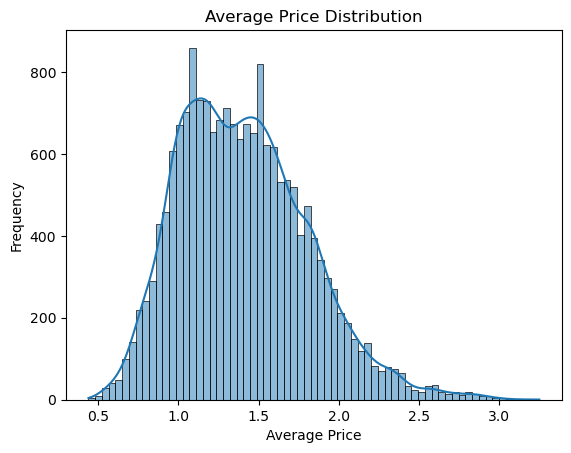

In [13]:
# Histogram for price distribution
sns.histplot(df['AveragePrice'], kde=True)
plt.title('Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.show()


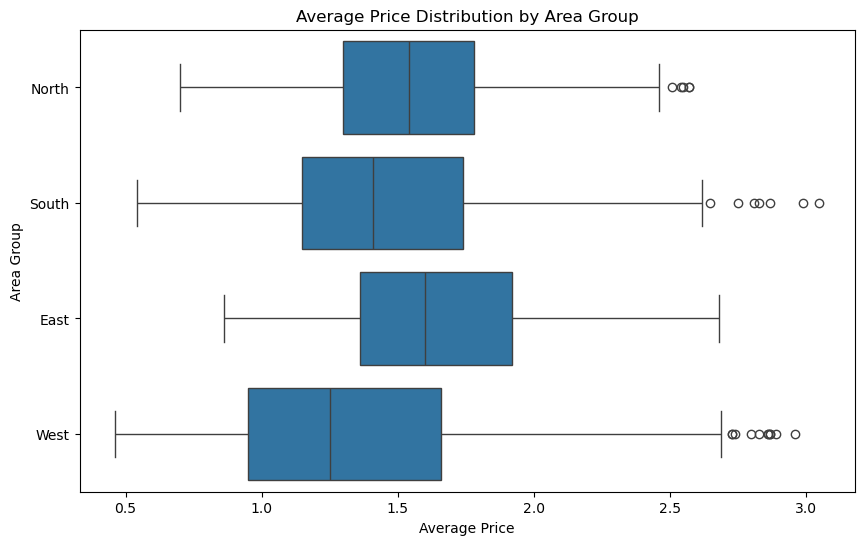

In [20]:
# Mapping of regions to area groups
region_groups = {
    'Albany': 'North', 'Boston': 'North', 'Chicago': 'North', 'BuffaloRochester': 'North',
    'BaltimoreWashington': 'East', 'Philadelphia': 'East', 'HartfordSpringfield': 'East',
    'Jacksonville': 'South', 'Atlanta': 'South', 'Orlando': 'South', 'MiamiFtLauderdale': 'South',
    'PhoenixTucson': 'West', 'SanDiego': 'West', 'LosAngeles': 'West', 'Seattle': 'West',
    # Add other regions here...
}

# Create a new column in the DataFrame for area group
df['area_group'] = df['region'].map(region_groups)

# Horizontal box plot for average price by area group
plt.figure(figsize=(10, 6))
sns.boxplot(y='area_group', x='AveragePrice', data=df, order=['North', 'South', 'East', 'West'])
plt.title('Average Price Distribution by Area Group')
plt.xlabel('Average Price')
plt.ylabel('Area Group')
plt.show()


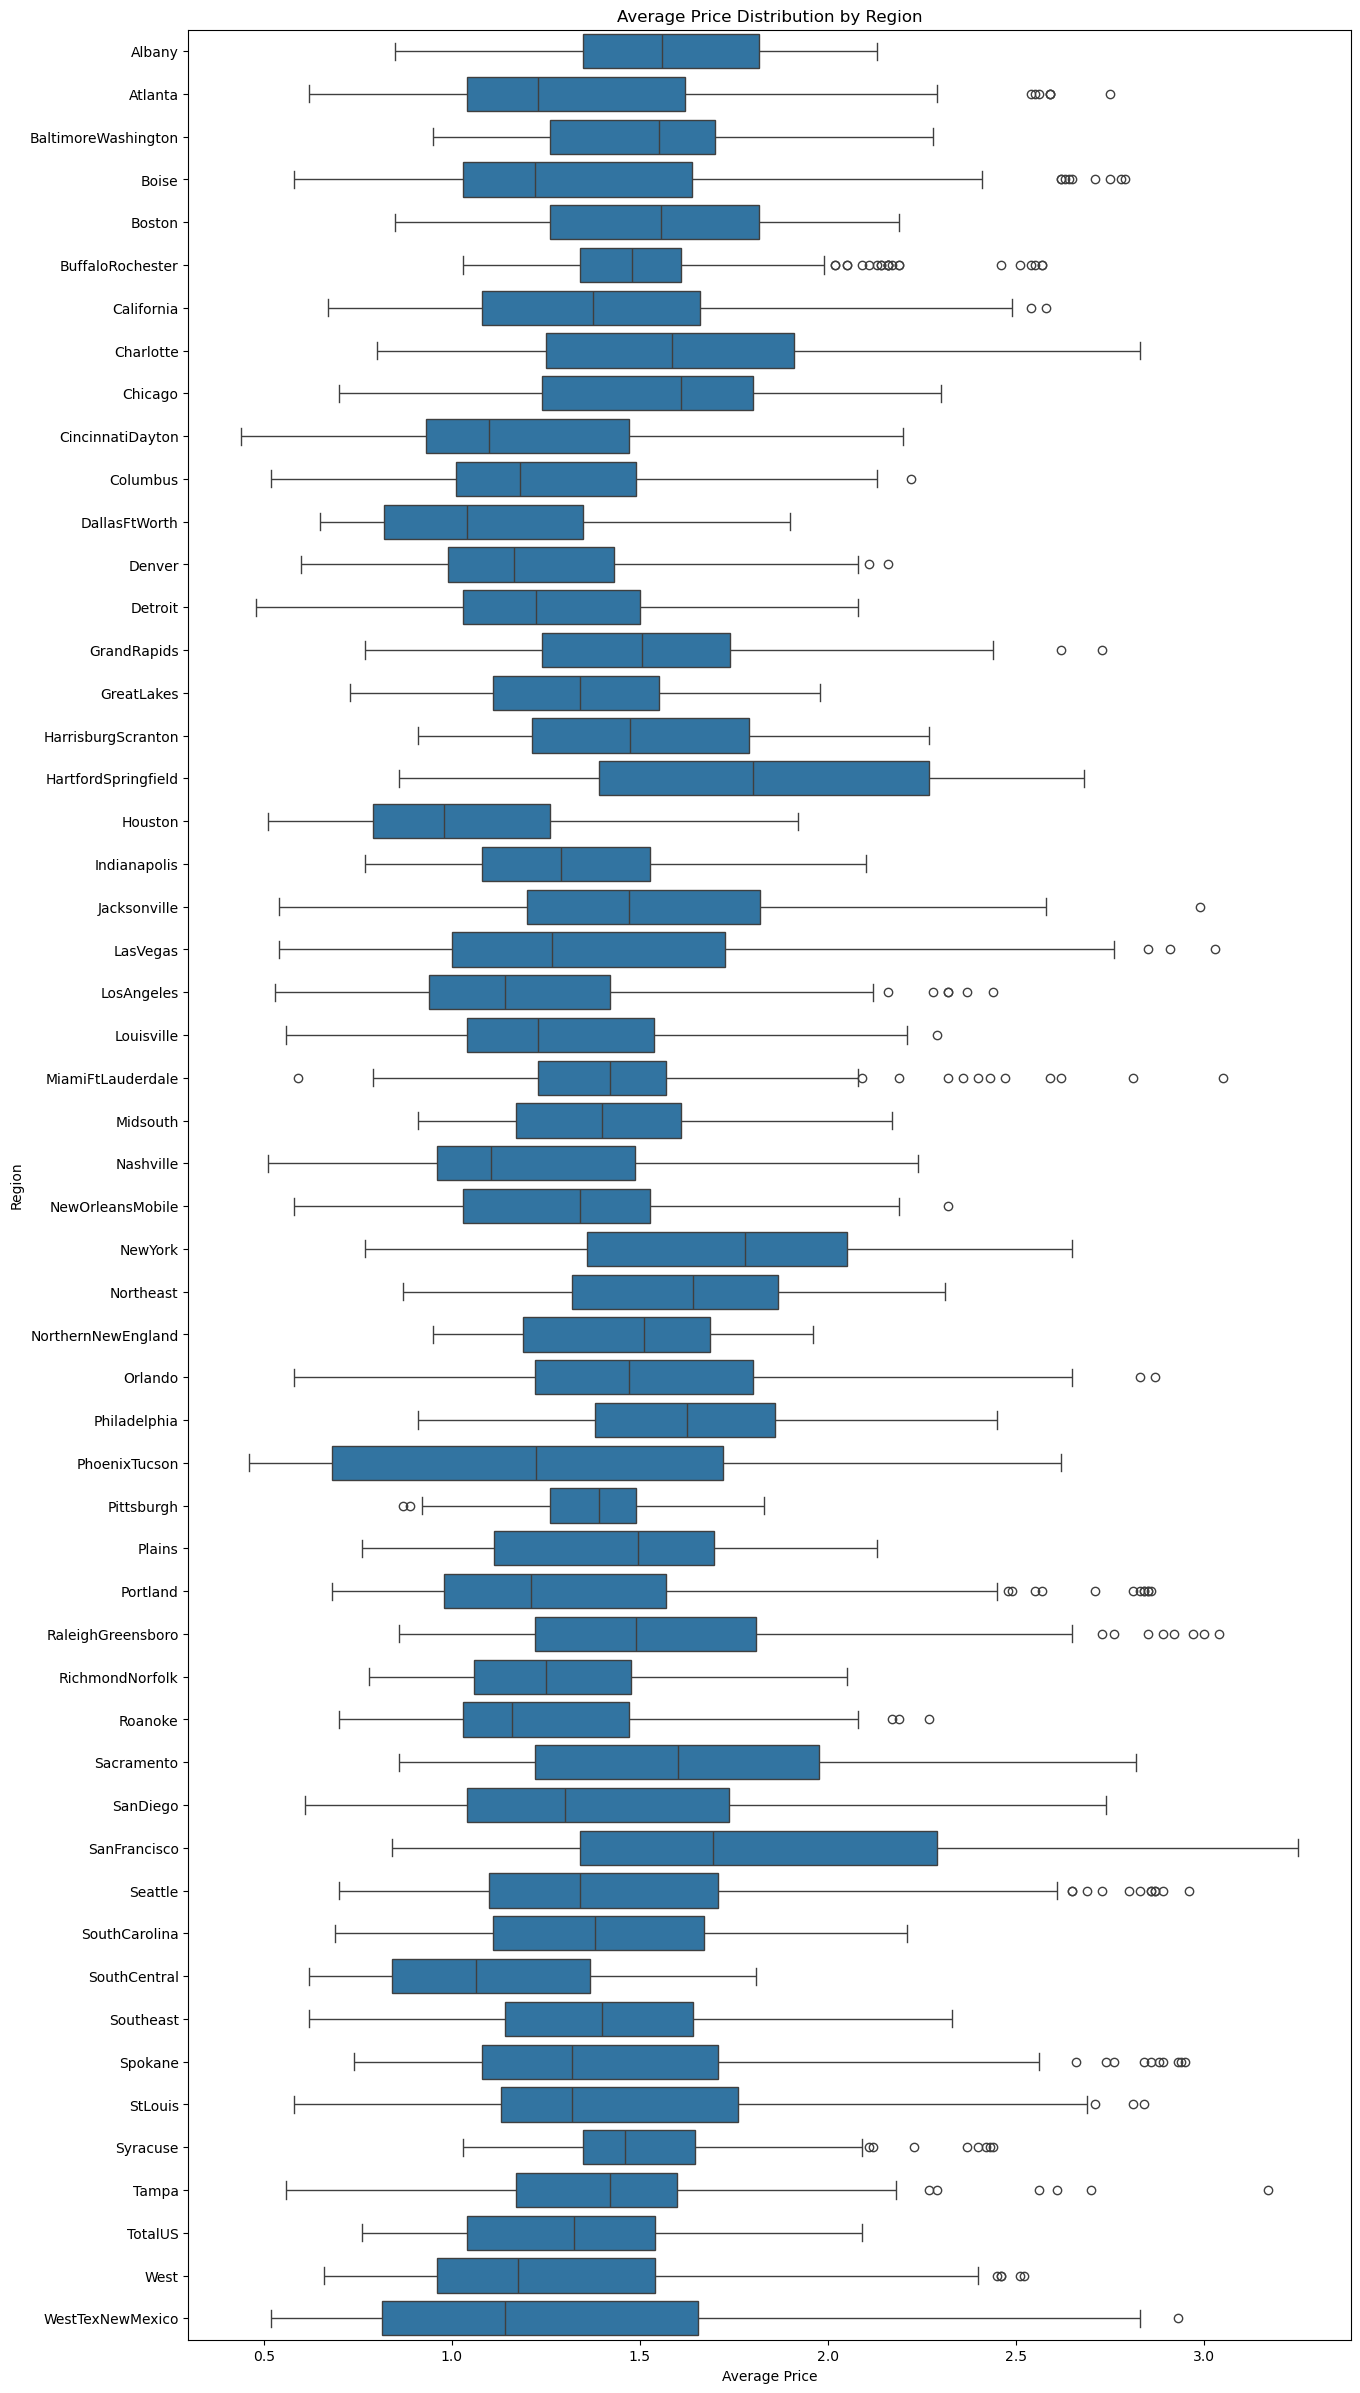

In [17]:
# Horizontal box plot for average price by region
plt.figure(figsize=(15, 30))
sns.boxplot(y='region', x='AveragePrice', data=df)
plt.title('Average Price Distribution by Region')
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.show()


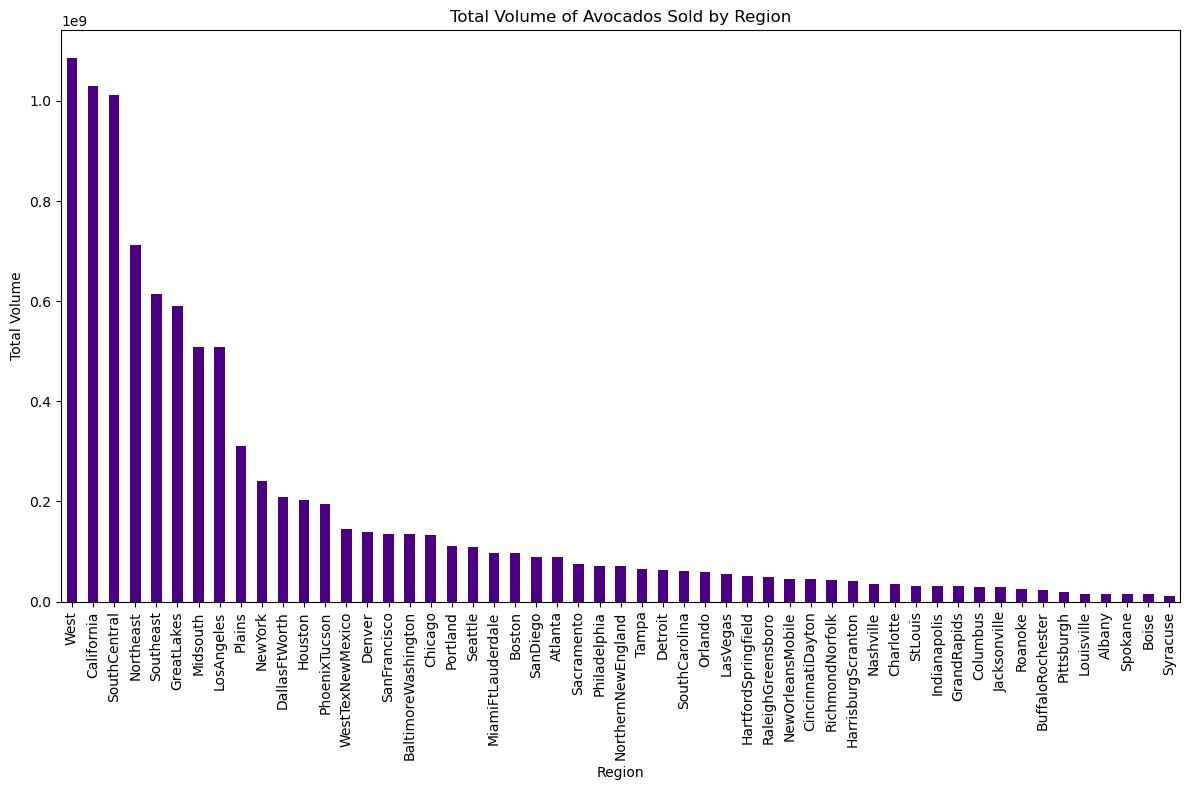

In [47]:
import matplotlib.pyplot as plt
# Filter out 'TotalUS' from the region data and re-calculate total volume by region
region_volume_filtered = region_volume.drop(labels='TotalUS')

# Plotting the filtered total volume for each region
plt.figure(figsize=(12, 8))
region_volume_filtered.plot(kind='bar', color='indigo')
plt.title('Total Volume of Avocados Sold by Region')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


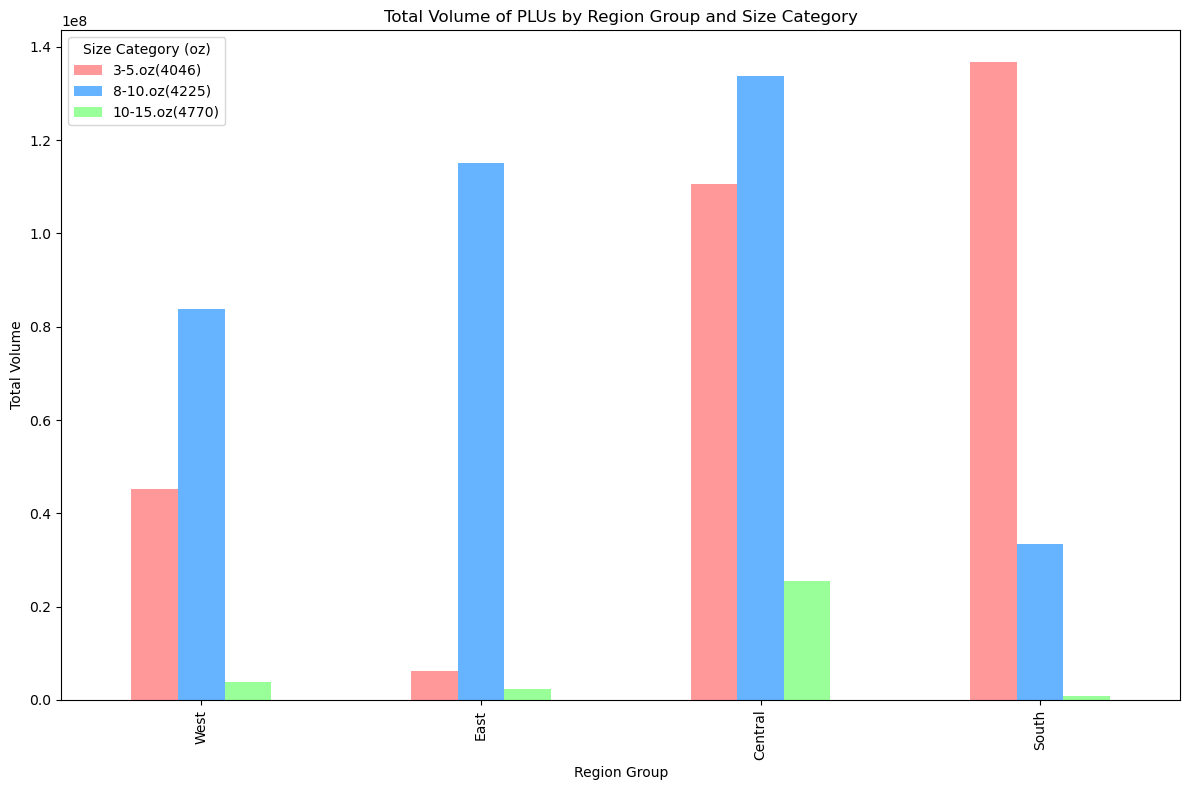

In [79]:
df['RegionGroup'] = df['region'].map(
    lambda x: next((group for group, regions in region_groups.items() if x in regions), 'Other')
)


plu_columns = ['3-5.oz(4046)', '8-10.oz(4225)', '10-15.oz(4770)']
region_group_plu = df.groupby('RegionGroup')[plu_columns].sum().loc[['West', 'East', 'Central', 'South']]
region_group_plu.plot(kind='bar', figsize=(12, 8), color=['#ff9999', '#66b3ff', '#99ff99'])

plt.title('Total Volume of PLUs by Region Group and Size Category')
plt.xlabel('Region Group')
plt.ylabel('Total Volume')
plt.legend(title='Size Category (oz)')
plt.tight_layout()
plt.show()

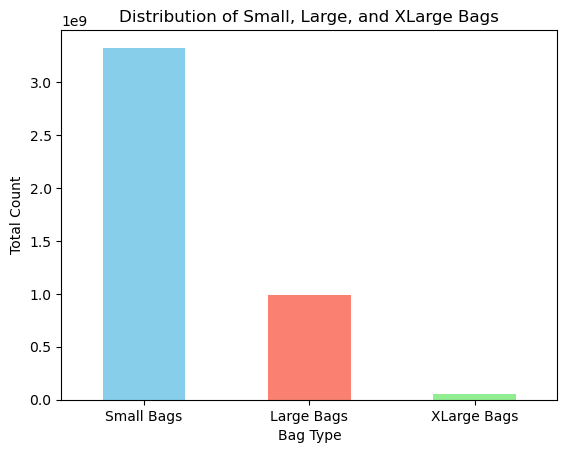

In [87]:
if {'Small Bags', 'Large Bags', 'XLarge Bags'}.issubset(df.columns):
    bag_totals = df[['Small Bags', 'Large Bags', 'XLarge Bags']].sum()
    bag_totals.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
    plt.title('Distribution of Small, Large, and XLarge Bags')
    plt.xlabel('Bag Type')
    plt.ylabel('Total Count')
    plt.xticks(rotation=0)
    plt.show()

In [21]:
# Convert date to datetime if not already done
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from date
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
    

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_excel(r'D:\\Etda_works\\Avocado.xlsx', sheet_name='Avocado')
print("Initial DataFrame shape:", df.shape)

Y = df['AveragePrice']
X = df.drop(['AveragePrice', 'Date'], axis=1)

print("Shape of X after dropping target:", X.shape)
print("Shape of Y:", Y.shape)

print("Data types in X before encoding:")
print(X.dtypes)

region_mapping = {
    'Northeast': 'North', 
    'Southeast': 'South', 
    'Midwest': 'North', 
    'Southwest': 'South', 
    'West': 'West', 
    'California': 'West',
}
X['region'] = X['region'].map(region_mapping)

X = pd.get_dummies(X, drop_first=True)

print("Shape of X after dummy encoding:", X.shape)

print("Number of NaNs ( Rows ) in X before dropping:", X.isnull().sum().sum())
print("Number of NaNs ( Rows ) in Y before dropping:", Y.isnull().sum())

X.dropna(inplace=True)
Y = Y[X.index]

print("Shape of X after dropping NaNs ( Rows ):", X.shape)
print("Shape of Y after dropping NaNs ( Rows ):", Y.shape)

X.columns = X.columns.astype(str)  # Convert column names to strings

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

Y_pred_lr = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))
print("Linear Regression RMSE:", rmse)


Initial DataFrame shape: (18249, 13)
Shape of X after dropping target: (18249, 11)
Shape of Y: (18249,)
Data types in X before encoding:
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object
Shape of X after dummy encoding: (18249, 12)
Number of NaNs ( Rows ) in X before dropping: 0
Number of NaNs ( Rows ) in Y before dropping: 0
Shape of X after dropping NaNs ( Rows ): (18249, 12)
Shape of Y after dropping NaNs ( Rows ): (18249,)
Linear Regression RMSE: 0.3123071018869863


Linear Regression Mean RMSE: 0.6905132884514643
Random Forest Mean RMSE: 0.264792706267489


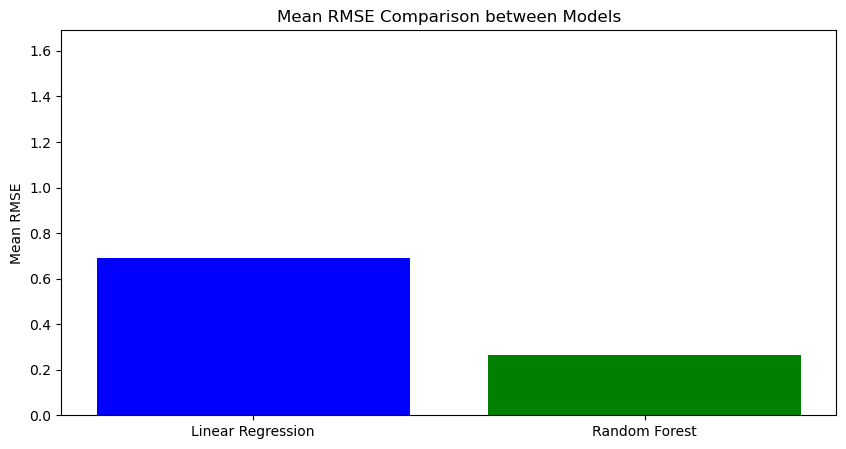

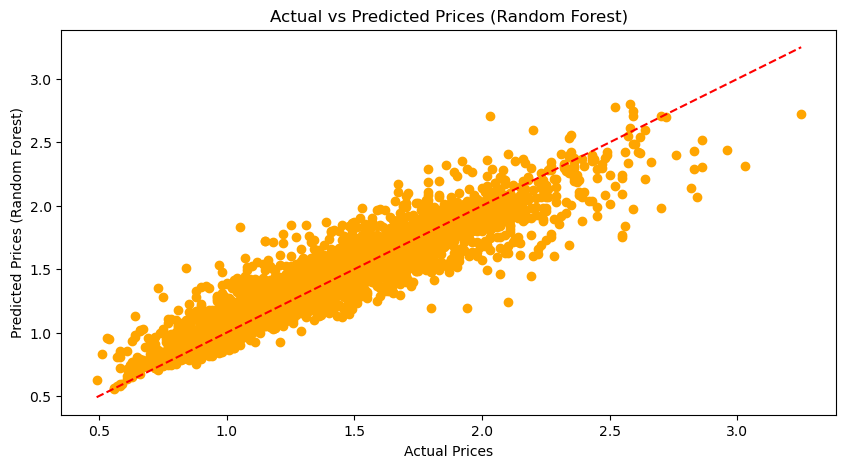

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the datase

# Define features and target variable
Y = df['AveragePrice']
X = df.drop(['AveragePrice', 'Date'], axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Ensure columns are of string type
X.columns = X.columns.astype(str)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor()

# Fit models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Cross-validation for Linear Regression
lr_scores = cross_val_score(lr_model, X, Y, scoring='neg_mean_squared_error', cv=5)
lr_rmse_scores = np.sqrt(-lr_scores)
print("Linear Regression Mean RMSE:", lr_rmse_scores.mean())

# Cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X, Y, scoring='neg_mean_squared_error', cv=5)
rf_rmse_scores = np.sqrt(-rf_scores)
print("Random Forest Mean RMSE:", rf_rmse_scores.mean())

# Plotting the Mean RMSE
models = ['Linear Regression', 'Random Forest']
mean_rmse = [lr_rmse_scores.mean(), rf_rmse_scores.mean()]

plt.figure(figsize=(10, 5))
plt.bar(models, mean_rmse, color=['blue', 'green'])
plt.ylabel('Mean RMSE')
plt.title('Mean RMSE Comparison between Models')
plt.ylim(0, max(mean_rmse) + 1)  # Adjust y-axis limit for better visibility
plt.show()

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Plotting Actual vs Predicted Prices
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Ideal line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices (Random Forest)')
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.show()
